step 1: import modules.

In [2]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

step 2: create csv file and let it be filled with data from main.py

In [3]:
#with open('dataset.csv', 'w', newline='') as file:
    #writer = csv.writer(file)
    #writer.writerow(["y cord", "ray Left", "ray Mid Left", "ray Forward", "ray Mid Right", "ray Right", "left", "right"])

step 3: check data

In [34]:
data = pd.read_csv('dataset.csv')
data.head()

,y cord,ray Left,ray Mid Left,ray Forward,ray Mid Right,ray Right,left,right
0,-165,300,300,300,300,300,0,0
1,-165,300,300,300,300,300,0,0
2,-165,300,300,300,300,300,0,0
3,-168,300,300,300,300,300,0,0
4,-172,300,300,300,300,300,0,0


step 4: create variables like train and validantion.

In [35]:
X = data.drop(columns=['left', 'right'])
y = pd.concat([data['left'], data['right']], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

y_train.head()

,left,right
5895,0,0
6631,1,0
5182,0,0
7051,0,0
4064,0,0


step 5: Create the model.

In [36]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0,2),                    # dropout rate 0.2 is best with: ~0.9717, 0.3 is: ~0,0019 lower, 0.4 is: ~0,0016 lower and 0.1 is: ~0,0021
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),            # without layers: ~0,9702
    layers.Dropout(0,2),                    # with 256 layers: ~0.9716 
    layers.Dense(256, activation="relu"),   # with 512 layers: ~0.9698
    layers.BatchNormalization(),
    layers.Dropout(0,2),
    layers.Dense(2, activation="sigmoid") # sigmoid works better than relu ~0.04 difrence
])

step 6: compile and create early stopping function.

In [37]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

step 7: fit model (possibly also make a model history for graphs).

In [38]:
model_history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=512, epochs=200, callbacks=[early_stopping])

Epoch 1/200


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - binary_accuracy: 0.5772 - loss: 0.8917 - val_binary_accuracy: 0.5797 - val_loss: 0.6448
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8154 - loss: 0.5610 - val_binary_accuracy: 0.6145 - val_loss: 0.5972
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8979 - loss: 0.4871 - val_binary_accuracy: 0.8491 - val_loss: 0.4797
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9308 - loss: 0.4122 - val_binary_accuracy: 0.9361 - val_loss: 0.4266
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9366 - loss: 0.3583 - val_binary_accuracy: 0.9367 - val_loss: 0.3823
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9457 - loss: 0.3087 - val_binary_accuracy: 0.9372 - val_loss: 0.3449
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9511 - loss: 0.2670 - val_binary_accuracy: 0.9380 - val_loss: 0.2959
Epoch 8/200
12/12 ━━━━━━

step 8: copy paste graph stuff

<Axes: title={'center': 'Accuracy'}>

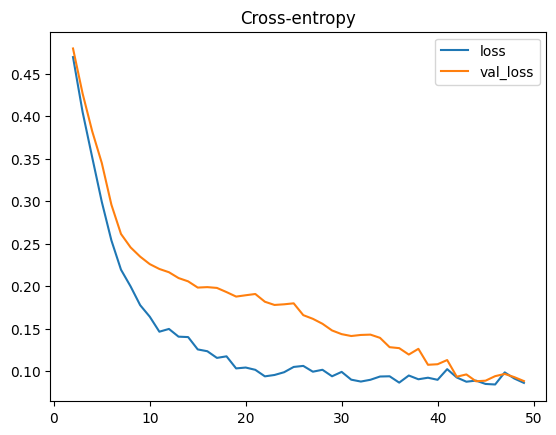

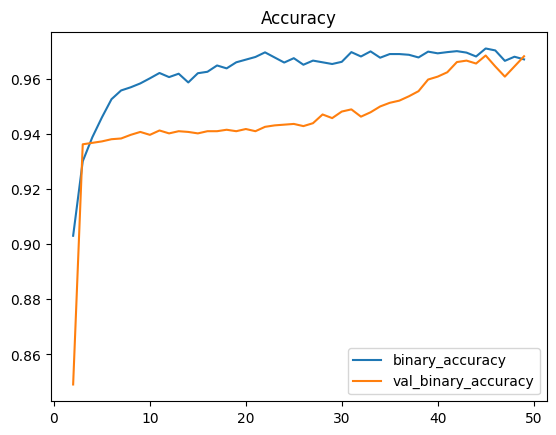

In [39]:
history_df = pd.DataFrame(model_history.history)
history_df.loc[2:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[2:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

stap 9: check if the neural network is really working with a custom question.

In [40]:
import numpy as np

question = pd.DataFrame({'question1': [250,300,300,300,300,300]})
question_array = question['question1'].to_numpy().reshape(1, -1)

predictions = model.predict(question_array)
binary_predictions = (predictions > 0.5).astype(int)
print(binary_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0 0]]


stap 10: save the model to be used in main.

In [41]:
model.save("/Users/jack/Documents/code/coderclass/python/deeplearning-dragracing/brain-model.keras")